In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/a-year-of-pumpkin-prices/chicago_9-24-2016_9-30-2017.csv
/kaggle/input/a-year-of-pumpkin-prices/columbia_9-24-2016_9-30-2017.csv
/kaggle/input/a-year-of-pumpkin-prices/baltimore_9-24-2016_9-30-2017.csv
/kaggle/input/a-year-of-pumpkin-prices/los-angeles_9-24-2016_9-30-2017.csv
/kaggle/input/a-year-of-pumpkin-prices/st-louis_9-24-2016_9-30-2017.csv
/kaggle/input/a-year-of-pumpkin-prices/dallas_9-24-2016_9-30-2017.csv
/kaggle/input/a-year-of-pumpkin-prices/atlanta_9-24-2016_9-30-2017.csv
/kaggle/input/a-year-of-pumpkin-prices/miami_9-24-2016_9-30-2017.csv
/kaggle/input/a-year-of-pumpkin-prices/san-fransisco_9-24-2016_9-30-2017.csv
/kaggle/input/a-year-of-pumpkin-prices/new-york_9-24-2016_9-30-2017.csv
/kaggle/input/a-year-of-pumpkin-prices/philadelphia_9-24-2016_9-30-2017.csv
/kaggle/input/a-year-of-pumpkin-prices/boston_9-24-2016_9-30-2017.csv
/kaggle/input/a-year-of-pumpkin-prices/detroit_9-24-2016_9-30-2017.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('/kaggle/input/a-year-of-pumpkin-prices/atlanta_9-24-2016_9-30-2017.csv')
data.head()

,Commodity Name,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,...,Color,Environment,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode
0,PUMPKINS,ATLANTA,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,09/24/2016,140.0,154.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,PUMPKINS,ATLANTA,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,09/24/2016,145.0,154.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,PUMPKINS,ATLANTA,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,09/24/2016,150.0,154.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,PUMPKINS,ATLANTA,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,09/24/2016,150.0,150.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,PUMPKINS,ATLANTA,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,10/01/2016,140.0,154.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


In [4]:
data = {
    'Low Price' : ['140.0','145.0','150.0','150.0','140.0'],
    'High Price' : ['154.75','154.75','154.75','150.00','154.75']}
df = pd.DataFrame(data)
df.drop(['Low Price','High Price'],axis=1)

""
0
1
2
3
4


In [5]:
print(df.head())

  Low Price High Price
0     140.0     154.75
1     145.0     154.75
2     150.0     154.75
3     150.0     150.00
4     140.0     154.75


In [6]:
df.head()

,Low Price,High Price
0,140.0,154.75
1,145.0,154.75
2,150.0,154.75
3,150.0,150.00
4,140.0,154.75


In [7]:
#Low_Price = x
#High_Price = y
Low = df.values[:, :1]
High = df.values[:, 1:2]

In [8]:
low = np.array([146.0,155.0,185.0,179.0,168.0])
high = np.array([154.75,164.75,198.75,189.00,175.75])

Text(0, 0.5, 'High_Price')

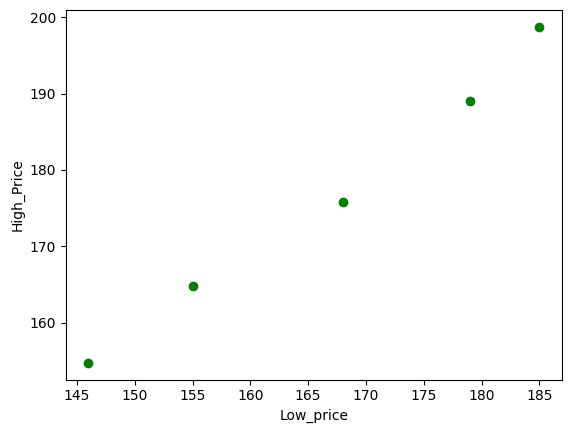

In [9]:
plt.scatter(low,high,color = 'g')
plt.xlabel('Low_price')
plt.ylabel('High_Price')

In [10]:
low = low.reshape(-1,1)

In [11]:
from sklearn.model_selection import train_test_split
low_train,low_test,high_train,high_test = train_test_split(low,high,test_size=0.2,random_state=42)

In [12]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()


In [13]:
#low = low.reshape(-1,1)
lr.fit(low_train,high_train)

LinearRegression()

In [14]:
from sklearn.metrics import r2_score
score = r2_score(high_test,lr.predict(low_test))
print(score)

nan


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Text(0, 0.5, 'Y')

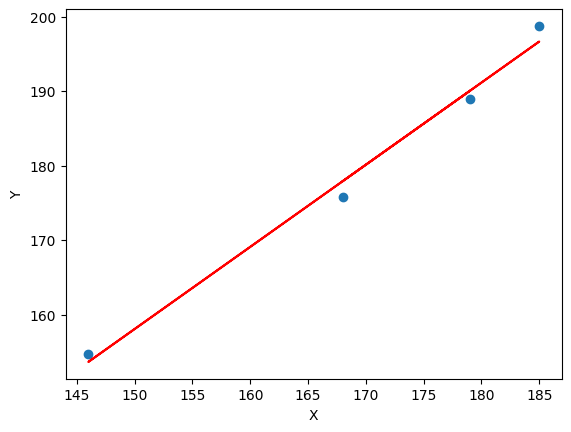

In [15]:
plt.plot(low_train,lr.predict(low_train),color='r')
plt.scatter(low_train,high_train)
plt.xlabel('X')
plt.ylabel('Y')

In [16]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2,include_bias = True)
low_train_poly = poly.fit_transform(low_train)
low_test_poly = poly.transform(low_test)

In [17]:
low_train_poly

array([[1.0000e+00, 1.6800e+02, 2.8224e+04],
       [1.0000e+00, 1.8500e+02, 3.4225e+04],
       [1.0000e+00, 1.4600e+02, 2.1316e+04],
       [1.0000e+00, 1.7900e+02, 3.2041e+04]])

In [18]:
low_test_poly

array([[1.0000e+00, 1.5500e+02, 2.4025e+04]])

In [19]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(low_train_poly,high_train)
high_pred = regression.predict(low_test_poly)
score = r2_score(high_test,high_pred)
print(score)

nan


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [20]:
print(regression.coef_)

[ 0.         -2.39858079  0.01062572]


In [21]:
print(regression.intercept_)

278.49144514465365


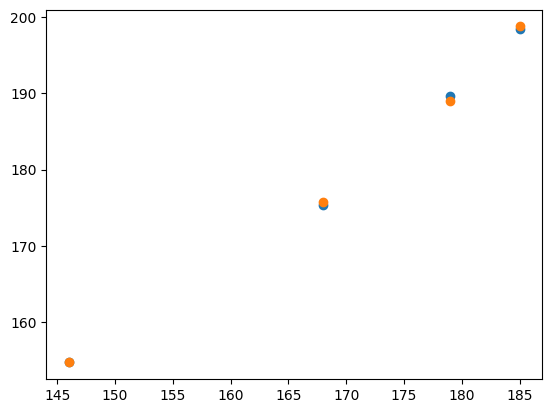

In [22]:
plt.scatter(low_train,regression.predict(low_train_poly))
plt.scatter(low_train,high_train)

In [23]:
#new data
low_new = np.linspace(-2,2,200).reshape(200,1)
low_new_poly = poly.transform(low_new)
low_new_poly

array([[ 1.00000000e+00, -2.00000000e+00,  4.00000000e+00],
       [ 1.00000000e+00, -1.97989950e+00,  3.92000202e+00],
       [ 1.00000000e+00, -1.95979899e+00,  3.84081210e+00],
       [ 1.00000000e+00, -1.93969849e+00,  3.76243024e+00],
       [ 1.00000000e+00, -1.91959799e+00,  3.68485644e+00],
       [ 1.00000000e+00, -1.89949749e+00,  3.60809070e+00],
       [ 1.00000000e+00, -1.87939698e+00,  3.53213303e+00],
       [ 1.00000000e+00, -1.85929648e+00,  3.45698341e+00],
       [ 1.00000000e+00, -1.83919598e+00,  3.38264185e+00],
       [ 1.00000000e+00, -1.81909548e+00,  3.30910836e+00],
       [ 1.00000000e+00, -1.79899497e+00,  3.23638292e+00],
       [ 1.00000000e+00, -1.77889447e+00,  3.16446554e+00],
       [ 1.00000000e+00, -1.75879397e+00,  3.09335623e+00],
       [ 1.00000000e+00, -1.73869347e+00,  3.02305497e+00],
       [ 1.00000000e+00, -1.71859296e+00,  2.95356178e+00],
       [ 1.00000000e+00, -1.69849246e+00,  2.88487664e+00],
       [ 1.00000000e+00, -1.67839196e+00

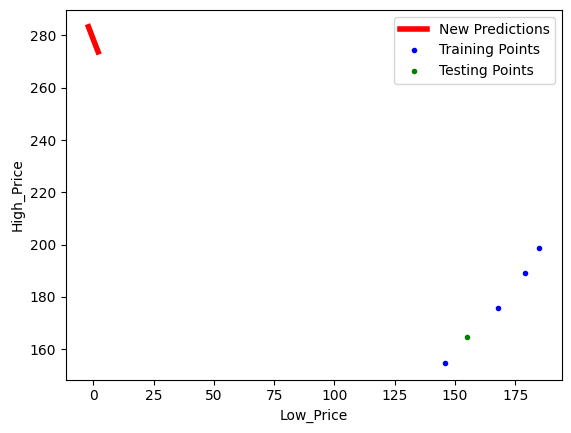

In [24]:
high_new = regression.predict(low_new_poly)
plt.plot(low_new,high_new,"r-",linewidth=4,label=("New Predictions"))
plt.plot(low_train,high_train,"b.",label='Training Points')
plt.plot(low_test,high_test,"g.",label ='Testing Points')
plt.xlabel("Low_Price")
plt.ylabel("High_Price")
plt.legend()
plt.show()